In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.endpoint import EndModel
from aeons.utils import *
from aeons.beta import *
from aeons.plotting import plot_quantiles

In [30]:
name, samples = get_samples('gauss_8')
model = EndModel(samples)
endpoint_true = model.true_endpoint()
logXf_true = samples.logX().iloc[endpoint_true]
# samples = samples.iloc[:endpoint_true]

samples['beta_logL'] = get_betas_logL(samples)

In [33]:
Npoints = 25
iterations = make_iterations(endpoint_true, Npoints)
logbetas_term = np.zeros(Npoints)
logbetas_term_half = np.zeros(Npoints)

for i, ndead in enumerate(iterations):
    points = points_at_iteration(samples, ndead)
    logbetas_term[i] = np.log(get_beta_end(points, ndead))
    logbetas_term_half[i] = np.log(get_beta_end(points, ndead, epsilon=0.5))
    print('\r', f'Iteration {ndead}/{iterations[-1]}', end='')

No beta found
No beta found
 Iteration 186/17925No beta found
 Iteration 925/17925No beta found


/tmp/ipykernel_317479/336214369.py:8: RuntimeWarning: divide by zero encountered in log
  logbetas_term[i] = np.log(get_beta_end(points, ndead))
/tmp/ipykernel_317479/336214369.py:9: RuntimeWarning: divide by zero encountered in log
  logbetas_term_half[i] = np.log(get_beta_end(points, ndead, epsilon=0.5))


 Iteration 1664/17925No beta found
 Iteration 16447/17925

/tmp/ipykernel_317479/1461552093.py:17: RuntimeWarning: overflow encountered in scalar divide
  return Zlive/Zdead - epsilon


 Iteration 17925/17925

In [23]:
ndead = 17925
points = points_at_iteration(samples, ndead)

In [24]:
logw = points.logX() + points.logL
logw = logw - logw.max()
logL = points.logL
logX = points.logX()
epsilon = 0.5

def func(beta):
    logw = beta * logL + logX
    w = np.exp(logw - logw.max())
    Zdead = np.sum(w[:ndead])
    Zlive = np.sum(w[ndead:])
    if (Zdead == 0):
        return np.inf
    return Zlive/Zdead - epsilon
    
from scipy import optimize
res = optimize.root_scalar(func, bracket=[1, 1e3])
res.root

7.202424235284662

(-15.0, 5.0)

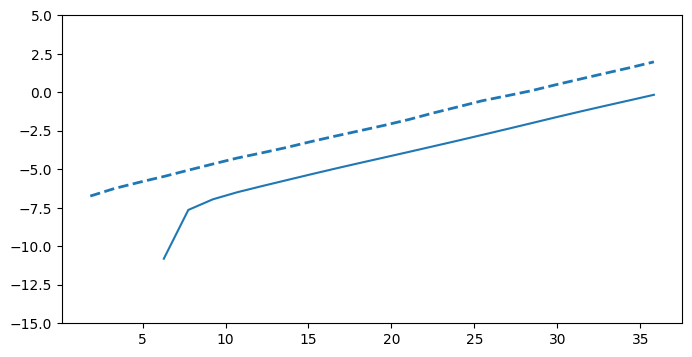

In [34]:
plt.figure(figsize=(8, 4))
logXs = samples.logX().iloc[iterations]
plt.plot(-logXs, logbetas_term_half, color='C0', ls='--', lw=2, zorder=100)
plt.plot(-logXs, logbetas_term, color='C0')
plt.ylim(-15, 5)